In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
ins = pd.read_csv('insurance.csv')
ins.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
ins.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

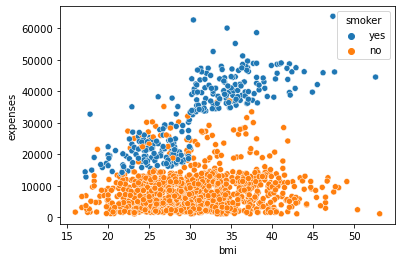

In [6]:
#visualizing BMI vs expenses
#numerial vs numerical -->scatterplot

sns.scatterplot(data = ins, x = 'bmi' , y = 'expenses', hue = 'smoker')

<AxesSubplot:>

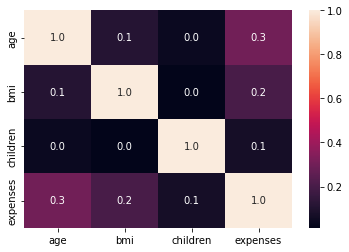

In [7]:
#correlation between two features is 1 or near to 1 
#then we can drop 1 featue and keep 1 feature
sns.heatmap(ins.corr(),annot = True ,fmt = '0.1f')

In [8]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
print(ins['sex'].value_counts(),'\n')
print(ins['smoker'].value_counts(),'\n')
print(ins['region'].value_counts())

male      676
female    662
Name: sex, dtype: int64 

no     1064
yes     274
Name: smoker, dtype: int64 

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [10]:
#conver categorical features into numeric
#label encoder

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
ins['sex'] = le.fit_transform(ins['sex'])
ins['smoker'] = le.fit_transform(ins['smoker'])

In [11]:
ins.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,southwest,16884.92
1,18,1,33.8,1,0,southeast,1725.55
2,28,1,33.0,3,0,southeast,4449.46
3,33,1,22.7,0,0,northwest,21984.47
4,32,1,28.9,0,0,northwest,3866.86


In [12]:
x=pd.get_dummies(ins['region'])
x.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [13]:
ins = pd.concat([ins,x],axis= 1)
ins

,age,sex,bmi,children,smoker,region,expenses,northeast,northwest,southeast,southwest
0,19,0,27.9,0,1,southwest,16884.92,0,0,0,1
1,18,1,33.8,1,0,southeast,1725.55,0,0,1,0
2,28,1,33.0,3,0,southeast,4449.46,0,0,1,0
3,33,1,22.7,0,0,northwest,21984.47,0,1,0,0
4,32,1,28.9,0,0,northwest,3866.86,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,northwest,10600.55,0,1,0,0
1334,18,0,31.9,0,0,northeast,2205.98,1,0,0,0
1335,18,0,36.9,0,0,southeast,1629.83,0,0,1,0
1336,21,0,25.8,0,0,southwest,2007.95,0,0,0,1


In [14]:
ins = ins.drop('region',axis = 1)
ins.head()

,age,sex,bmi,children,smoker,expenses,northeast,northwest,southeast,southwest
0,19,0,27.9,0,1,16884.92,0,0,0,1
1,18,1,33.8,1,0,1725.55,0,0,1,0
2,28,1,33.0,3,0,4449.46,0,0,1,0
3,33,1,22.7,0,0,21984.47,0,1,0,0
4,32,1,28.9,0,0,3866.86,0,1,0,0


In [15]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   int32  
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   int32  
 5   expenses   1338 non-null   float64
 6   northeast  1338 non-null   uint8  
 7   northwest  1338 non-null   uint8  
 8   southeast  1338 non-null   uint8  
 9   southwest  1338 non-null   uint8  
dtypes: float64(2), int32(2), int64(2), uint8(4)
memory usage: 57.6 KB


In [16]:
# Seperate features (X) and labels (Y)

X = ins.drop('expenses', axis = 1)
Y = ins['expenses']

In [17]:
X.head()

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
0,19,0,27.9,0,1,0,0,0,1
1,18,1,33.8,1,0,0,0,1,0
2,28,1,33.0,3,0,0,0,1,0
3,33,1,22.7,0,0,0,1,0,0
4,32,1,28.9,0,0,0,1,0,0


In [18]:
Y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

In [19]:
#train and test split

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.2 , random_state=2)


In [20]:
xtrain.head()

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
882,21,0,22.1,0,0,1,0,0,0
505,37,1,30.9,3,0,0,1,0,0
798,58,0,33.1,0,0,0,0,0,1
792,22,0,23.2,0,0,1,0,0,0
201,48,0,32.2,1,0,0,0,1,0


In [21]:
xtest.head()

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
17,23,1,23.8,0,0,1,0,0,0
1091,55,0,29.8,0,0,1,0,0,0
273,50,1,27.5,1,0,1,0,0,0
270,18,1,29.4,1,0,0,0,1,0
874,44,1,21.9,3,0,1,0,0,0


In [22]:
# train a model - linear regression

from sklearn.linear_model import LinearRegression

model = LinearRegression()
#train the model
model.fit(xtrain,ytrain)

LinearRegression()

In [23]:
ypred = model.predict(xtest)
ypred[:4]

array([ 1902.49465713, 11976.18932629, 10505.18716835,  2313.36756228])

In [24]:
ytest[:4]

17       2395.17
1091    11286.54
273      9617.66
270      1719.44
Name: expenses, dtype: float64

In [25]:
model.score(xtest,ytest)

0.7449487074718397